In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import os
import librosa
import librosa.display
import seaborn as sns

In [3]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000000000000000000000 
#setting hardcoded data points limit
font = {'weight' : 'bold',
        'size'   : 20}

mpl.rc('font', **font)
#setting font style

In [4]:
#path to audio files directory
DIR_PATH = '/content/drive/MyDrive/Fall2021-CAPSTONE/3-DataExploration/from_audio/segments/'
#DIR_PATH = '/content/drive/MyDrive/'

In [5]:
#paths to audio files
AUDIO_M = DIR_PATH + 'Guest_Male.wav'
AUDIO_F = DIR_PATH + 'Guest_Female.wav'
podcast_sample = DIR_PATH + 'podcast_1.wav'

In [6]:
#loading audio files using librosa library
#librosa.load(audio_file) loads an audio file as a time series (one-dimensional NumPy floating point array).
#output: audio time series y and sampling rate(the number of samples per second of audio) of y.
#Default sr (22050)
#Discretization

y_m, sr_m = librosa.load(AUDIO_M)
y_f, sr_f = librosa.load(AUDIO_F)
y_podcast, sr_podcast = librosa.load(podcast_sample,duration=10)

Amplitude Envelope

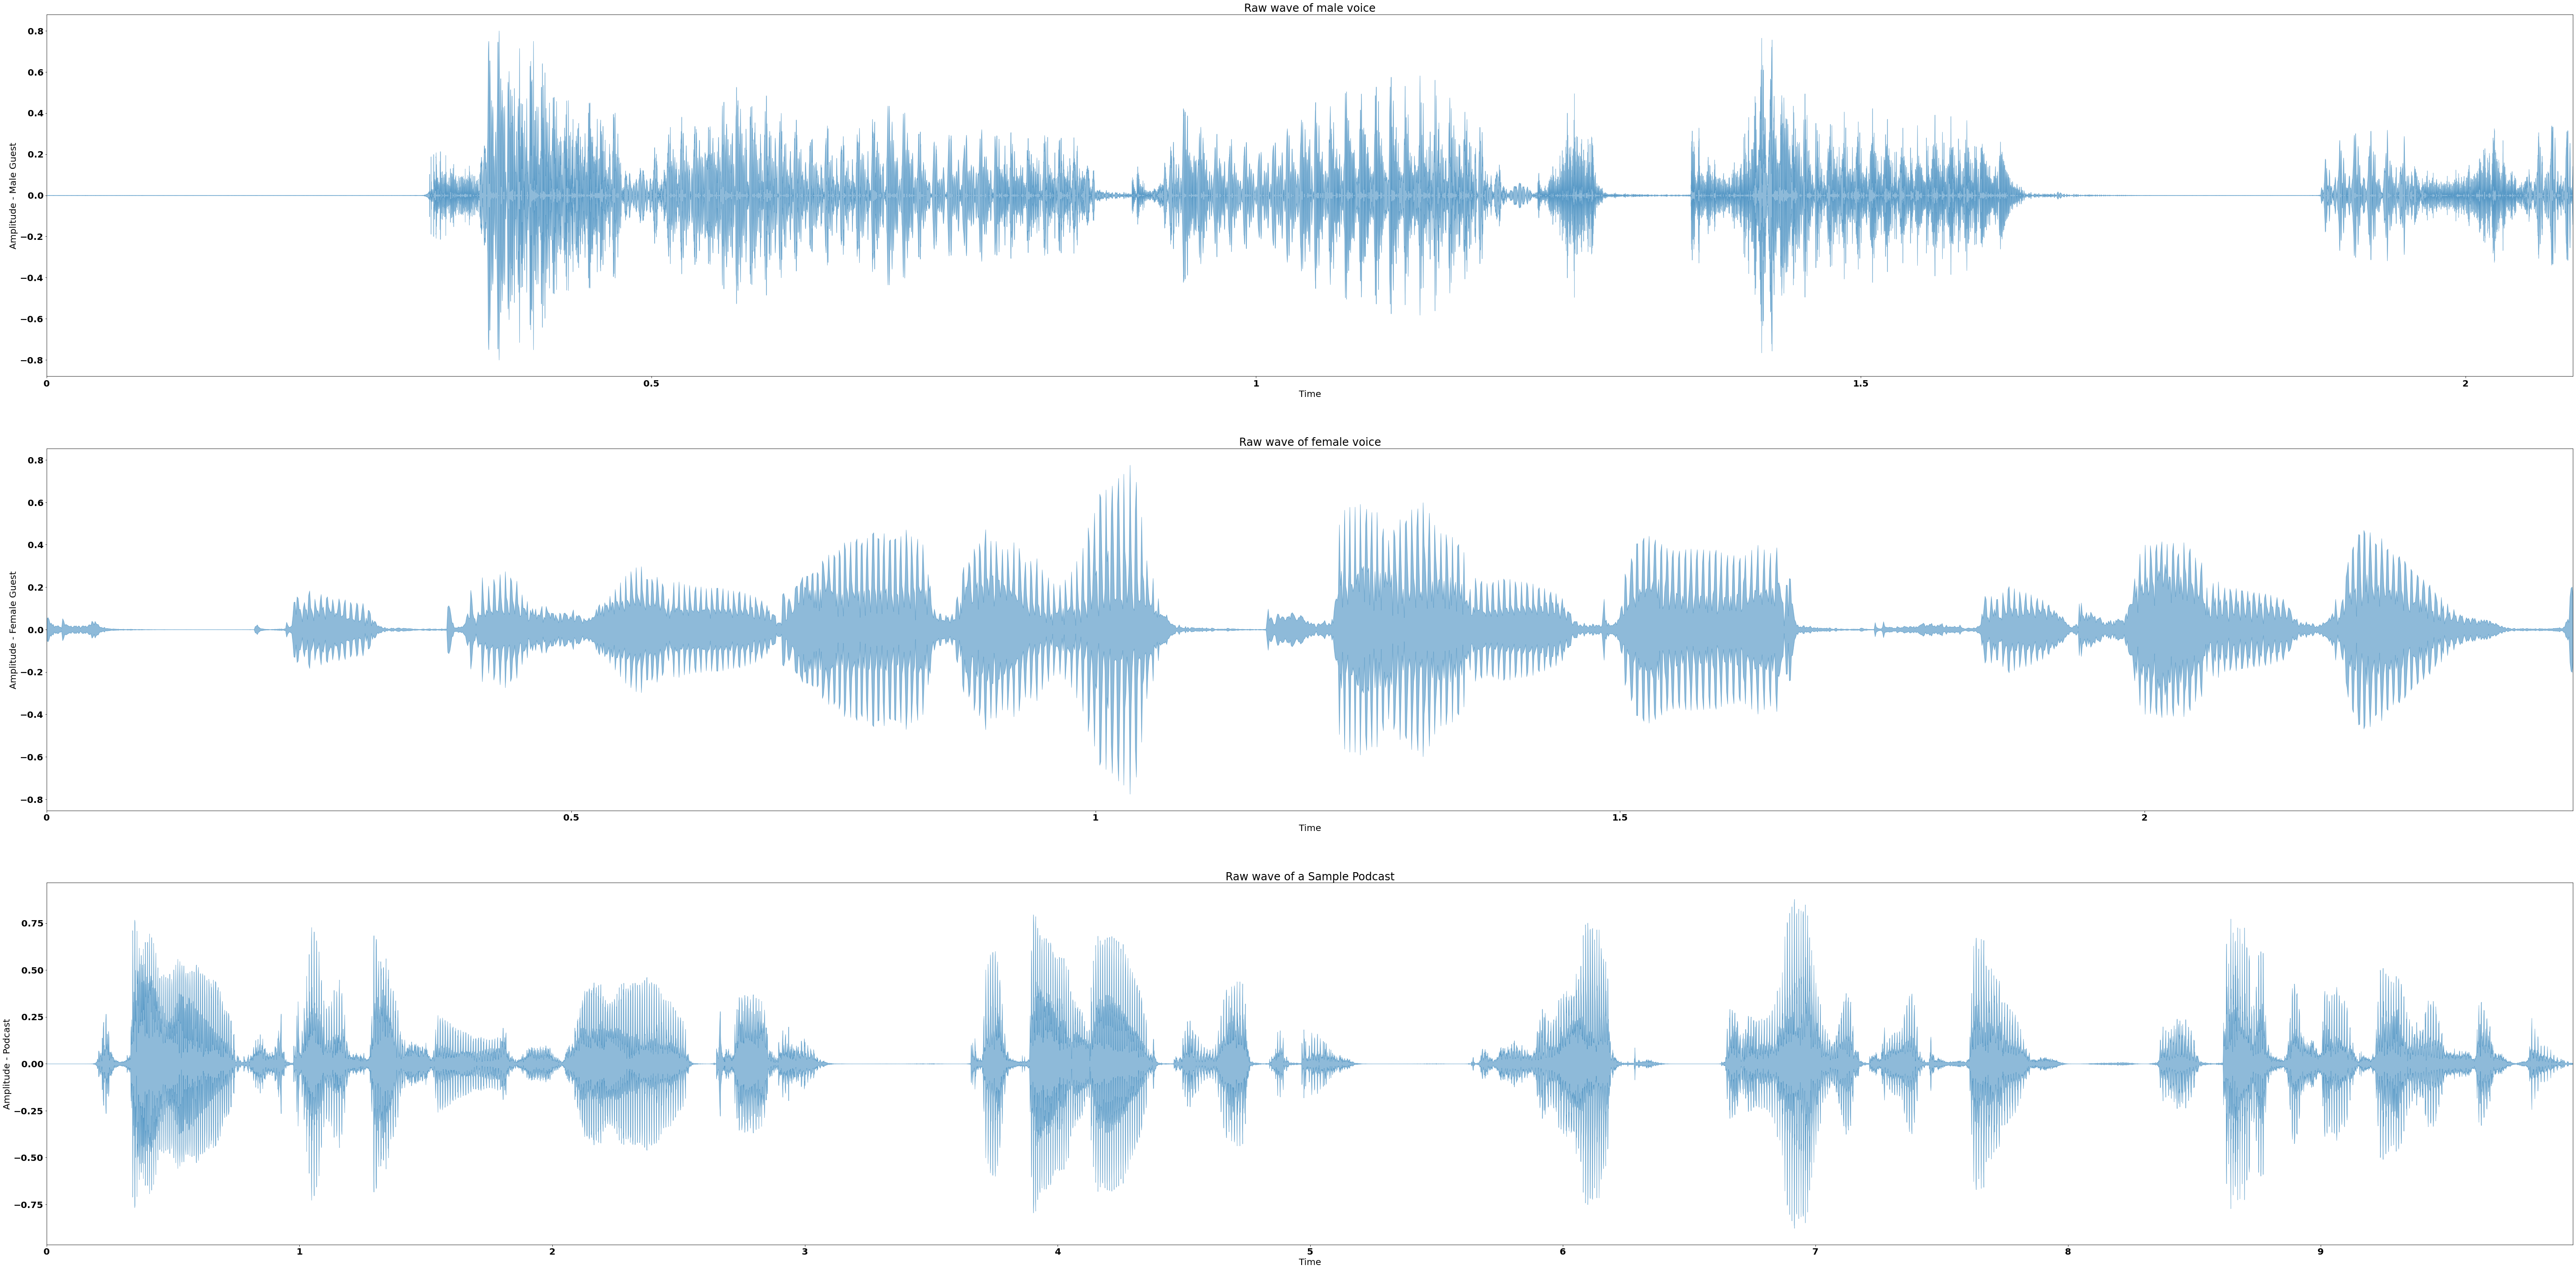

In [7]:
plt.figure(figsize=(100, 50))

plt.subplot(3, 1, 1)
plt.title('Raw wave of male voice')
plt.ylabel('Amplitude - Male Guest')
librosa.display.waveplot(y_m, sr=sr_m, alpha=0.5)

#librosa.display.waveplot to plot the amplitude envelope of a waveform.
#y - audio time series
#sr - sample rate
#alpha - to regulate transperancy of the graph plot. By default alpha = 1 and gives denser plot.


plt.subplot(3, 1, 2)
plt.title('Raw wave of female voice')
plt.ylabel('Amplitude - Female Guest')
librosa.display.waveplot(y_f, sr=sr_f, alpha=0.5)

plt.subplot(3, 1, 3)
plt.title('Raw wave of a Sample Podcast')
plt.ylabel('Amplitude - Podcast')
librosa.display.waveplot(y_podcast, sr=sr_podcast, alpha=0.5)

Spectrogram

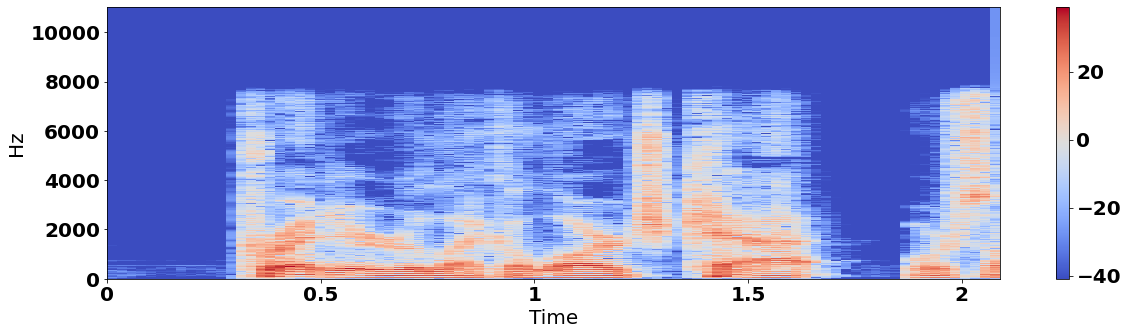

In [8]:
#spectrogram - male voice (hz)

X_m = librosa.stft(y_m) #getting Short-time Fourier transform(STFT) coefficients. 
#The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.
#Output: Complex-valued matrix of short-term Fourier transform coefficients.

#STFT converts signals such that we can know the amplitude of the given frequency at a given time. 
#Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.

# print("shape: ", X_m.shape)
# print("STFT: ", X_m)

Xdb_m = librosa.amplitude_to_db(abs(X_m)) #Convert an amplitude spectrogram to dB-scaled spectrogram.

# print("Abs X_m: ", abs(X_m))
# print("dB-scaled spectrogram: ", Xdb_m)

#To help measure the different levels of sound and deem which ones are safe and harmful,
#a nonlinear scale is used to describe the intensity of sound waves conveniently.
#This scale is known as the decibel scale and uses units called decibels (dB).
#Output: Amplitude matrix in terms of DB(decibels)

plt.figure(figsize=(20,5))
librosa.display.specshow(Xdb_m, sr=sr_m, x_axis='time', y_axis='hz')#Display a spectrogram/chromagram/etc.
#Xdb_m - matrix to display
#sr - sampling rate
plt.colorbar()

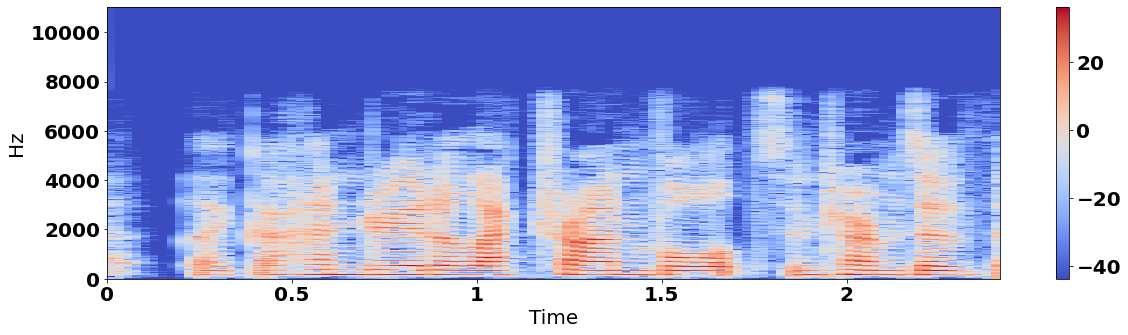

In [9]:
#spectogram - female voice (hz)

X_f = librosa.stft(y_f)
Xdb_f = librosa.amplitude_to_db(abs(X_f))
plt.figure(figsize=(20,5))
librosa.display.specshow(Xdb_f, sr=sr_f, x_axis='time', y_axis='hz')
plt.colorbar()

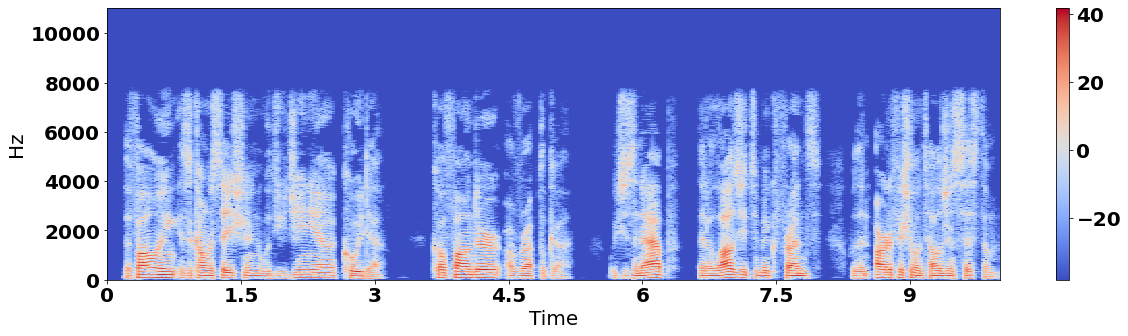

In [10]:
#spectogram - podcast (hz)

X_pod = librosa.stft(y_podcast)
Xdb_pod = librosa.amplitude_to_db(abs(X_pod))
plt.figure(figsize=(20,5))
librosa.display.specshow(Xdb_pod, sr=sr_podcast, x_axis='time', y_axis='hz')
plt.colorbar()

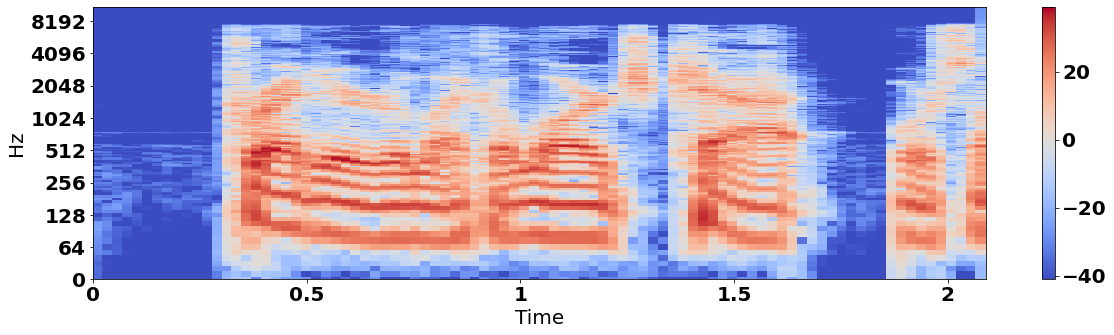

In [11]:
#spectogram - male voice (log)

X_m = librosa.stft(y_m)
Xdb_m = librosa.amplitude_to_db(abs(X_m))
plt.figure(figsize=(20,5))
librosa.display.specshow(Xdb_m, sr=sr_m, x_axis='time', y_axis='log')
#the spectrum is displayed on a log scale (y_axis = log).
plt.colorbar()

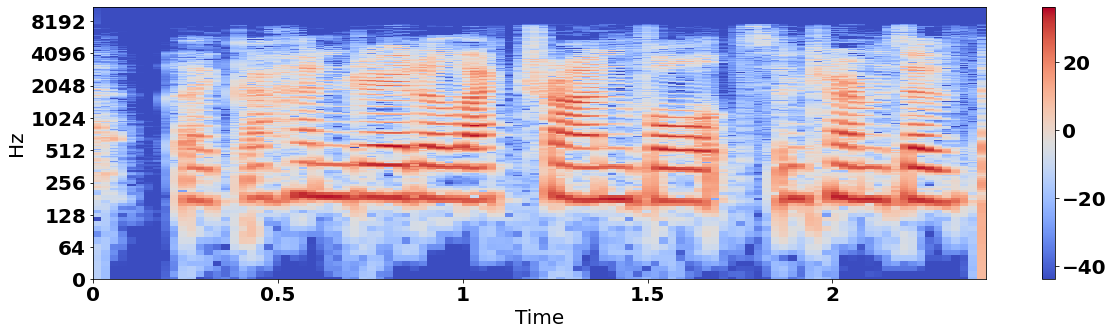

In [12]:
#spectogram - female voice (log)

X_f = librosa.stft(y_f)
Xdb_f = librosa.amplitude_to_db(abs(X_f))
plt.figure(figsize=(20,5))
librosa.display.specshow(Xdb_f, sr=sr_f, x_axis='time', y_axis='log')
plt.colorbar()

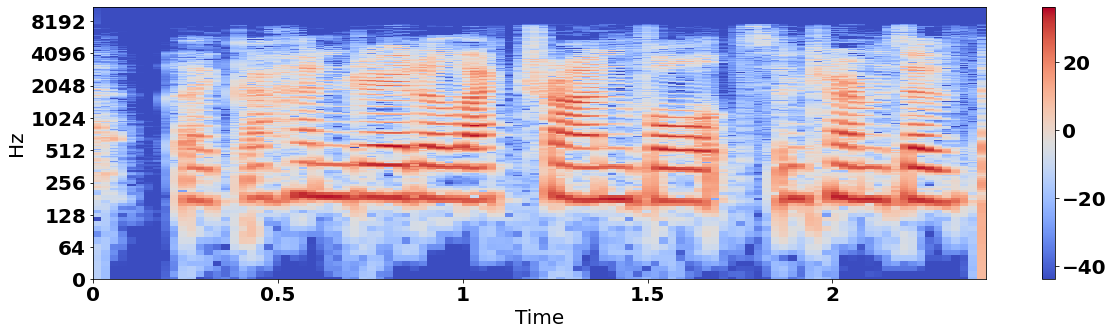

In [13]:
#spectogram - podcast (log)

X_pod = librosa.stft(y_podcast)
Xdb_pod = librosa.amplitude_to_db(abs(X_f))
plt.figure(figsize=(20,5))
librosa.display.specshow(Xdb_pod, sr=sr_podcast, x_axis='time', y_axis='log')
plt.colorbar()

Chromagram

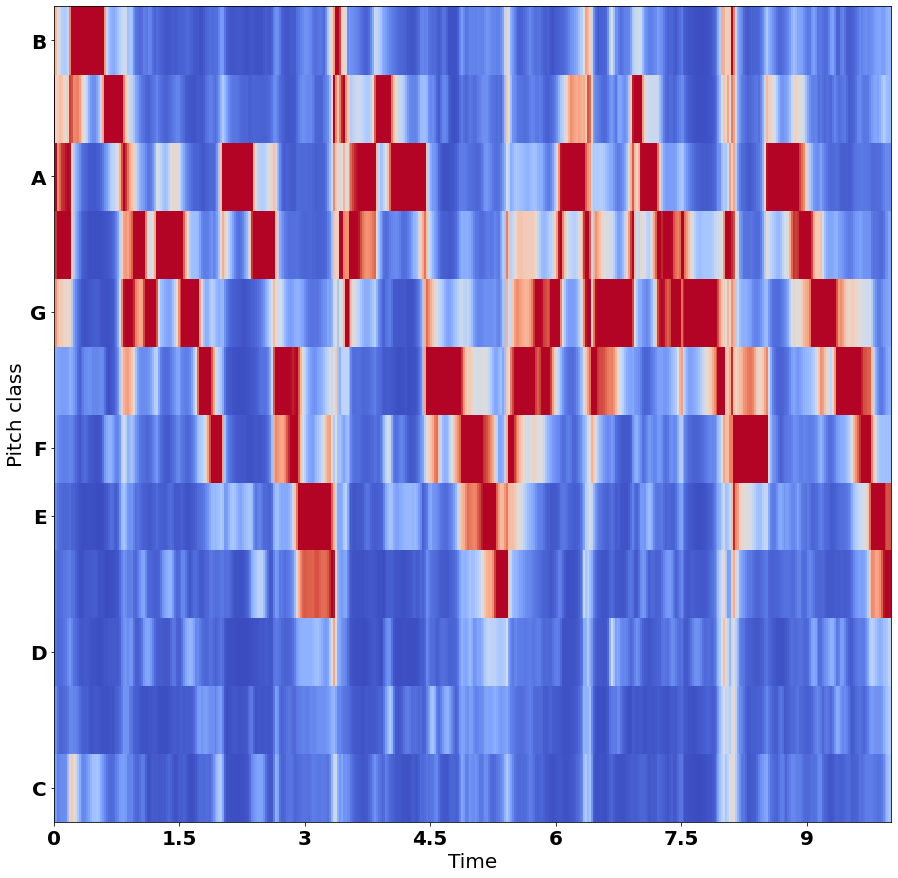

In [14]:
# Chromagram
# A chromagram closely relates to the twelve different pitch classes. 
#Chroma-based features, which are also referred to as "pitch class profiles", are a powerful tool for analyzing 
#music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. 
#One main property of chroma features is that they capture harmonic and melodic characteristics of music, 
#while being robust to changes in timbre and instrumentation.
import seaborn as sns

y_harmonic = librosa.effects.harmonic(y_podcast)
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr_podcast)
plt.figure(figsize=(15, 15))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

Spectral Centroid

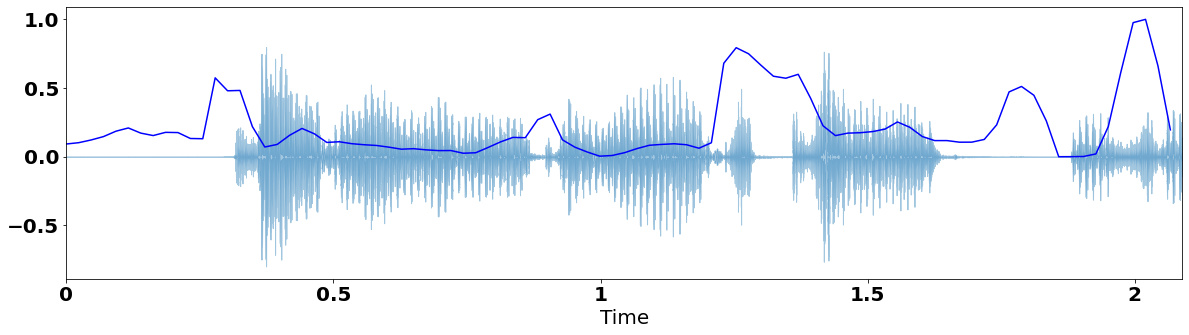

In [15]:
# Spectral centroid - male voice

#Each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, 
#from which the mean (centroid) is extracted per frame.

#Frame - A short slice of a time series used for analysis purposes. 
#This usually corresponds to a single column of a spectrogram matrix.

#Spectral Centroid - the measure of the brightness of a sound.

import sklearn

spectral_centroids = librosa.feature.spectral_centroid(y_m, sr=sr_m)[0] #Compute the spectral centroid.
#Output: centroid frequencies

# print("spectral_centroids: ", spectral_centroids)

# Computing the time variable for visualization
plt.figure(figsize=(20, 5))
frames = range(len(spectral_centroids))

# print("frames: ", frames)

t_m = librosa.frames_to_time(frames) #Converts frame counts to time (seconds).
#Output: time (in seconds) of each given frame number
#times[i] = frames[i] * hop_length / sr; (hop_length - number of samples between successive frames, 512 by default)

# print("frames_to_time: ", t_m)

# Normalising the spectral centroid for visualisation using Min-Max Scaling.
#X_std = (X - Xmin) / (Xmax- Xmin)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y_m, sr=sr_m, alpha=0.4)

# print("Normalized value: ", normalize(spectral_centroids))

plt.plot(t_m, normalize(spectral_centroids), color='b')

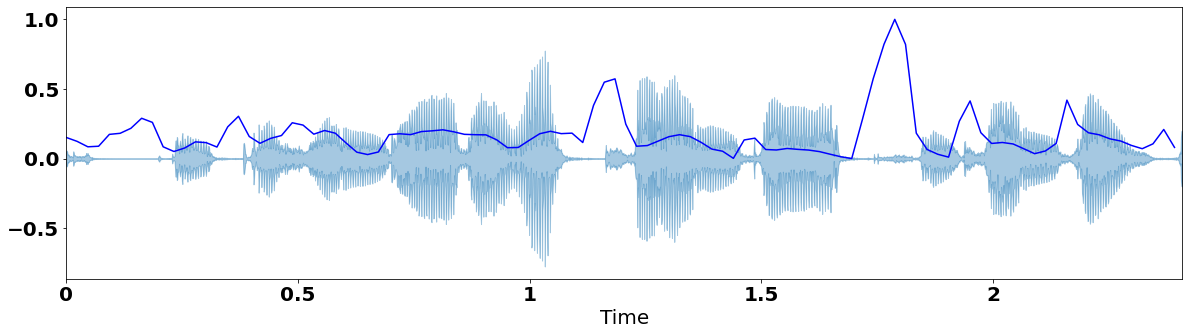

In [16]:
# Spectral centroid - female voice

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y_f, sr=sr_f)[0]
# Computing the time variable for visualization
plt.figure(figsize=(20, 5))
frames = range(len(spectral_centroids))
t_f = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y_f, sr=sr_f, alpha=0.4)
plt.plot(t_f, normalize(spectral_centroids), color='b')

Spectral Rolloff

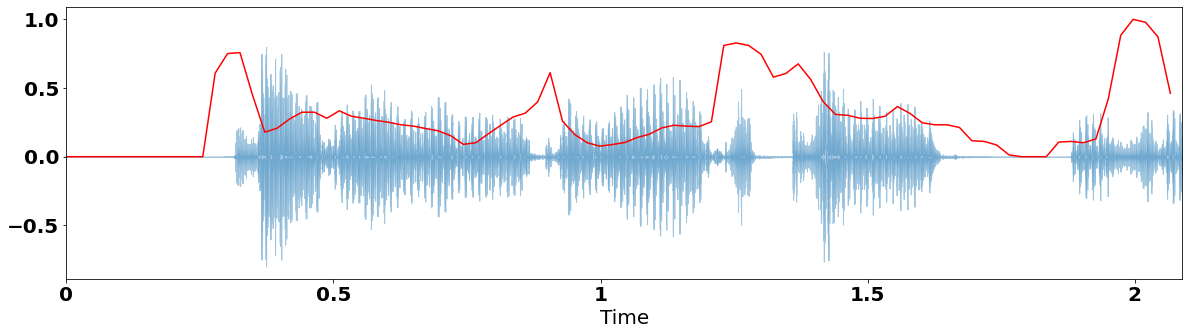

In [17]:
# Spectral Rolloff - male voice

# Rolloff - frequency below which 85% of the total spectral energy or magnitude distribution is concentrated
# It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0.

spectral_rolloff = librosa.feature.spectral_rolloff(y_m+0.01, sr=sr_m)[0]
#add 0.01 to audio series to enhance the signal and remove the zero values if any.
#computes the rolloff frequency for each frame in a signal

plt.figure(figsize=(20, 5))
librosa.display.waveplot(y_m, sr=sr_m, alpha=0.4)
plt.plot(t_m, normalize(spectral_rolloff), color='r')

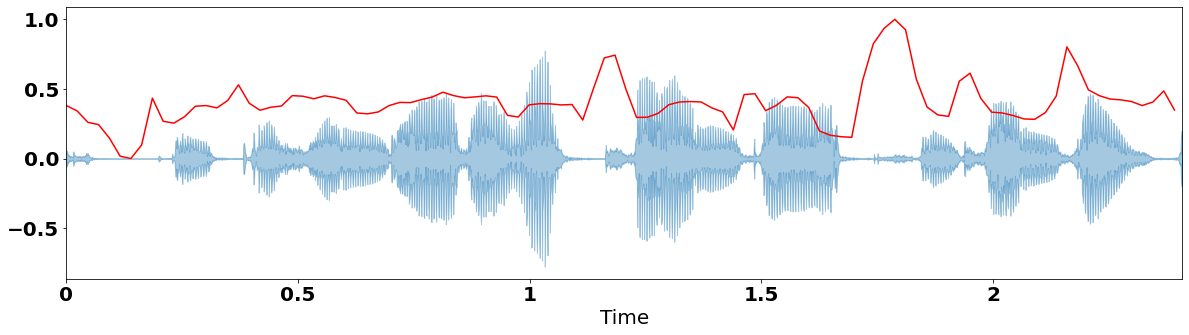

In [18]:
# Spectral Rolloff - female voice
spectral_rolloff = librosa.feature.spectral_rolloff(y_f+0.01, sr=sr_f)[0]
plt.figure(figsize=(20, 5))
librosa.display.waveplot(y_f, sr=sr_f, alpha=0.4)
plt.plot(t_f, normalize(spectral_rolloff), color='r')

Spectral Bandwidth

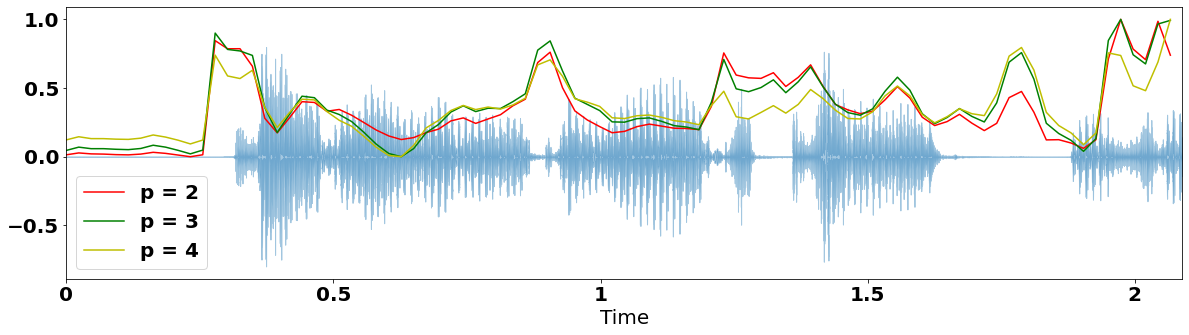

In [19]:
# Spectral Bandwidth - male voice

# The spectral bandwidth or spectral spread is derived from the spectral centroid. 
# It is the spectral range of interest around the centroid, that is, the variance from the spectral centroid.

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y_m+0.01, sr=sr_m)[0]
#Compute p’th-order spectral bandwidth. p value is used to scale the bandwidth. Default p =2.
# The spectral bandwidth 1 at frame t is computed by:
# (sum_k S[k, t] * (freq[k, t] - centroid[t])**p)**(1/p)
#Output: frequency bandwidth for each frame

spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y_m+0.01, sr=sr_m, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y_m+0.01, sr=sr_m, p=4)[0]
plt.figure(figsize=(20, 5))
librosa.display.waveplot(y_m, sr=sr_m, alpha=0.4)
plt.plot(t_m, normalize(spectral_bandwidth_2), color='r')
plt.plot(t_m, normalize(spectral_bandwidth_3), color='g')
plt.plot(t_m, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

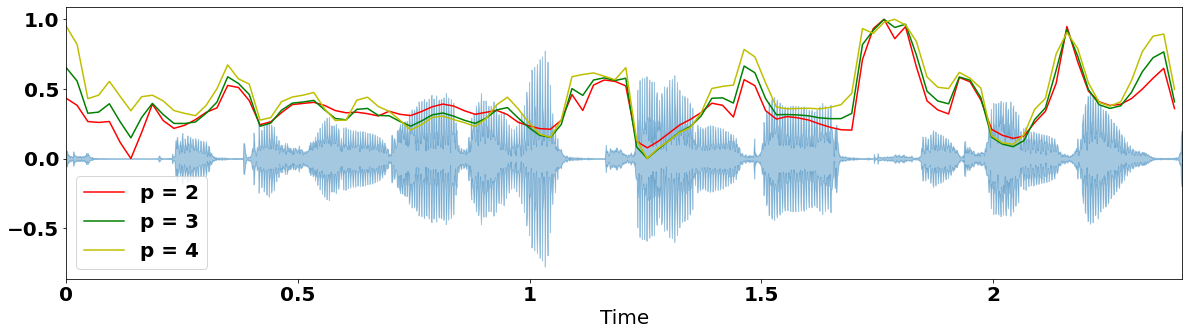

In [20]:
# Spectral Bandwidth - female voice
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y_f+0.01, sr=sr_f)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y_f+0.01, sr=sr_f, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y_f+0.01, sr=sr_f, p=4)[0]
plt.figure(figsize=(20, 5))
librosa.display.waveplot(y_f, sr=sr_f, alpha=0.4)
plt.plot(t_f, normalize(spectral_bandwidth_2), color='r')
plt.plot(t_f, normalize(spectral_bandwidth_3), color='g')
plt.plot(t_f, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

Zero Crossing Rate

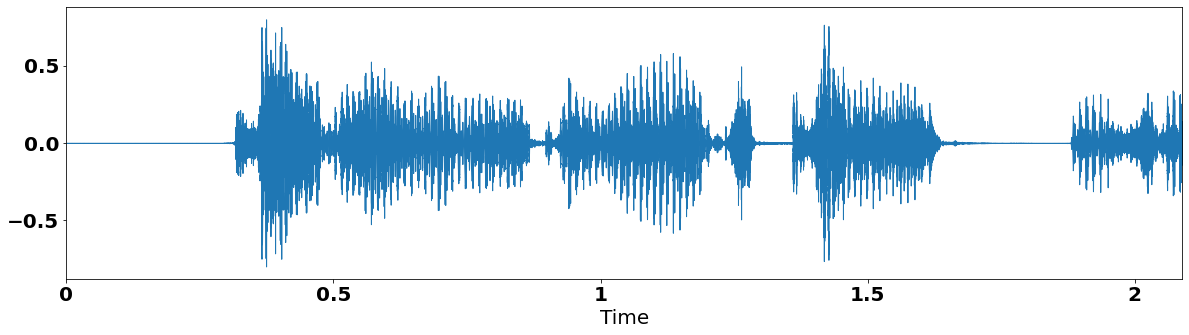

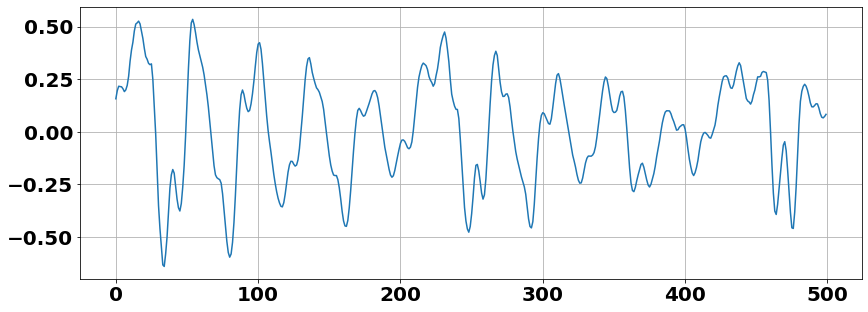

In [21]:
#zero-crossing rate - male voice

#A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal

#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(y_m, sr=sr_m)

# Zooming in

# Buffer range
n0 = 9000
n1 = 9500
plt.figure(figsize=(14, 5))
plt.plot(y_m[n0:n1])
plt.grid()

In [22]:
#Calculate zero crossing rates for selected frame

zero_crossings_m = librosa.zero_crossings(y_m[n0:n1], pad=False)
print(sum(zero_crossings_m))

22


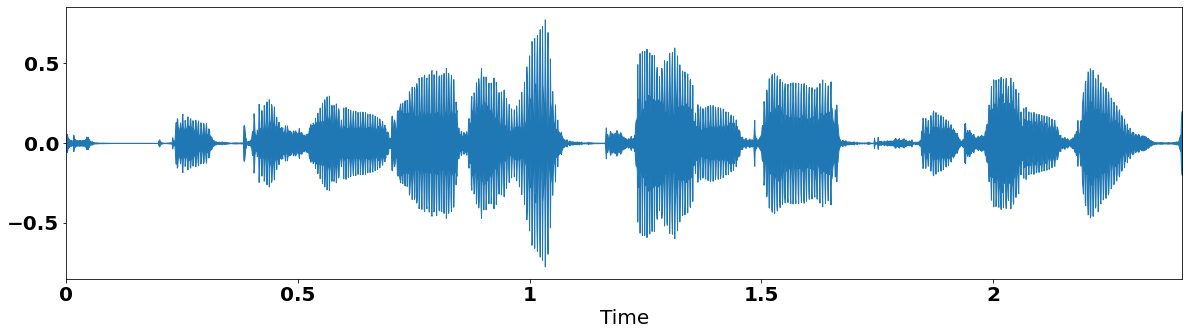

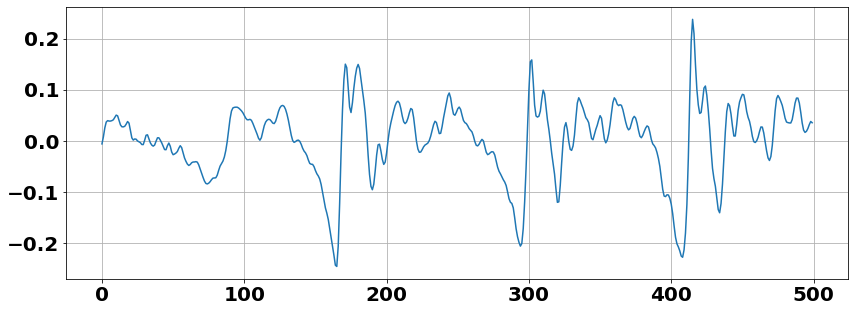

In [23]:
#zero-crossing rate - female voice

#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(y_f, sr=sr_f)
# Zooming in
n0 = 9000
n1 = 9500
plt.figure(figsize=(14, 5))
plt.plot(y_f[n0:n1])
plt.grid()

In [24]:
zero_crossings_f = librosa.zero_crossings(y_f[n0:n1], pad=False)
print(sum(zero_crossings_f))

33


MFCC (Mel Frequency Cepstral Coefficients)

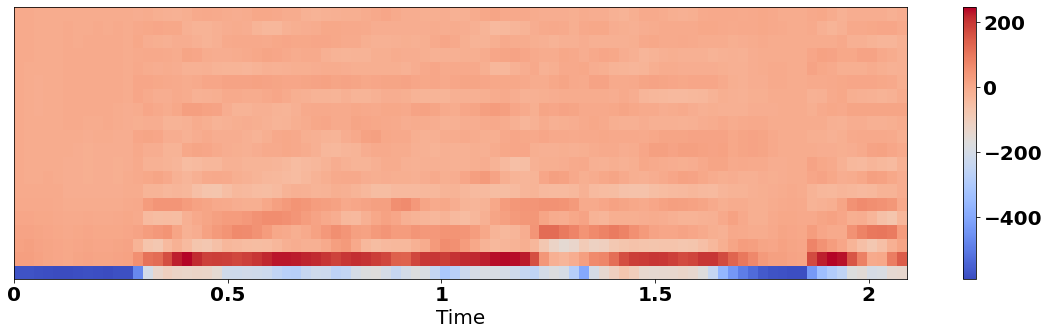

In [25]:
#mfcc - male voice

#The MFCC feature extraction technique basically includes windowing the signal, 
#applying the DFT(Discrete Fourier Transfrom), taking the log of the magnitude,
#and then warping the frequencies on a Mel scale, followed by applying the inverse DCT(Discrete Cosine Transform).

#Used to find high and low frequencies
#Mel Scale is established in human perception of sound.

mfccs_m = librosa.feature.mfcc(y_m, sr=sr_m)
#Computes Mel-frequency cepstral coefficients (MFCCs)
#Output: MFCC sequence

#Displaying  the MFCCs:
plt.figure(figsize=(20, 5))
librosa.display.specshow(mfccs_m, sr=sr_m, x_axis='time')
plt.colorbar()

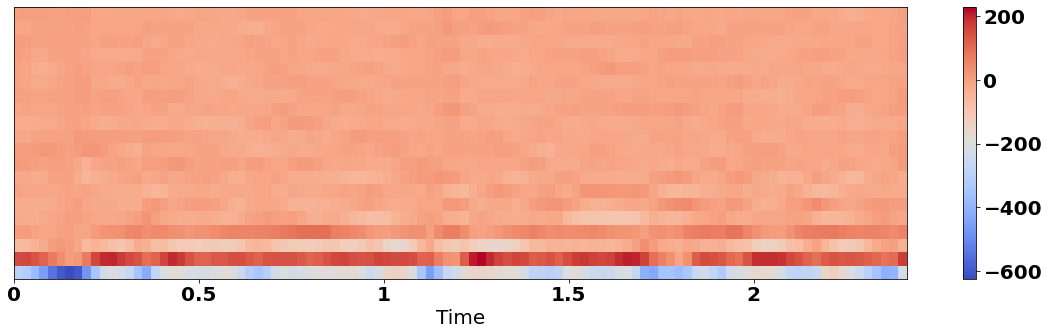

In [26]:
#mfcc - female voice
mfccs_f = librosa.feature.mfcc(y_f, sr=sr_f)
#Displaying  the MFCCs:
plt.figure(figsize=(20, 5))
librosa.display.specshow(mfccs_f, sr=sr_f, x_axis='time')
plt.colorbar()